## Lesson 2

In [22]:
import pandas as pd
import numpy as np

In [23]:
data_house=pd.read_csv('house_price.tsv',sep='\t')

In [24]:
data_house.head()

,Taxes,Bedrooms,Baths,Quadrant,NW,price,size,lot
0,1360,3,2.0,NW,1,145000,1240,18000
1,1050,1,1.0,NW,1,68000,370,25000
2,1010,3,1.5,NW,1,115000,1130,25000
3,830,3,2.0,SW,0,69000,1120,17000
4,2150,3,2.0,NW,1,163000,1710,14000


In [25]:
x=data_house.as_matrix(['size'])
y=data_house.as_matrix(['price'])

In [26]:
from sklearn import linear_model

In [27]:
regr=linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print('Coefficient:',regr.coef_)
print('Intercept:',regr.intercept_)
## print('Score',regr.score)

Coefficient: [[ 77.00769255]]
Intercept: [ 9161.15886434]


In [34]:
sst = sum((y - np.mean(y)) ** 2)
ssr = sum((regr.predict(x) - np.mean(y)) ** 2)
sse = sum((regr.predict(x) - y) ** 2)

print('Total sum of squares:', sst)
print('Explained sum of squares:', ssr)
print('Residual sum of squares:', sse)
print('R^2 score computed from score function:', regr.score(x, y))
print('R^2 score computed from ssr / sst:', ssr / sst)

Total sum of squares: [  3.14432520e+11]
Explained sum of squares: [  1.82219935e+11]
Residual sum of squares: [  1.32212585e+11]
R^2 score computed from score function: 0.579520002547
R^2 score computed from ssr / sst: [ 0.57952]


In [73]:
x=data_house.as_matrix(['size','Taxes'])
y=data_house.as_matrix(['price'])
regr=linear_model.LinearRegression()
regr.fit(x,y)
print('Coefficient:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficient: [[ 34.06888701  32.12061364]]
Intercept: [ 21115.05008427]


In [74]:
np.random.seed(2017)
'''
from datetime import datetime
np.random.seed(np.random.seed(datetime.now().microsecond))
'''


'\nfrom datetime import datetime\nnp.random.seed(np.random.seed(datetime.now().microsecond))\n'

In [88]:
train = np.random.choice([True, False], len(x), replace=True, p=[0.9,0.1])
## split the data into training and testing with a ratio of 80% and 20%

In [89]:
train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [90]:
x_train = x[train,:]
y_train = y[train]
x_test = x[~train,:]
y_test = y[~train]
regr.fit(x_train, y_train)
print('R^2 score: %.2f' % regr.score(x_test, y_test))

R^2 score: 0.42


In [91]:
from sklearn import metrics

#y_pred = regr.predict(x_test)
#metrics.explained_variance_score(y_test, y_pred)
#metrics.mean_absolute_error(y_test, y_pred)
#metrics.mean_squared_error(y_test, y_pred)

In [92]:
y_pred=regr.predict(x_test)

In [93]:
y_pred

array([[  69180.32364308],
       [ 102349.96780575],
       [ 130627.24222497],
       [ 119557.67561492],
       [ 144823.17390136],
       [  96146.32001603],
       [ 316007.12777911],
       [ 182739.08701307],
       [ 132718.20178618],
       [ 127502.11859307]])

In [94]:
metrics.explained_variance_score(y_test,y_pred)

0.42202429511408768

In [95]:
metrics.mean_absolute_error(y_test,y_pred)

28745.559282424329

In [96]:
metrics.mean_squared_error(y_test,y_pred)

1405350107.1183424

In [97]:
from sklearn import preprocessing

poly2 = preprocessing.PolynomialFeatures(2)
poly3 = preprocessing.PolynomialFeatures(3)

x2 = poly2.fit_transform(x)
x3 = poly3.fit_transform(x)  ## feature space , (x1,x2) is original space



In [98]:
x2.shape

(100, 6)

In [99]:
x3.shape

(100, 10)

In [100]:
x_train = x2[train,:]
x_test = x2[~train,:]
regr.fit(x_train, y_train)
print('R^2 score: %.2f' % regr.score(x_test, y_test))

x_train = x3[train,:]
x_test = x3[~train,:]
regr.fit(x_train, y_train)
print('R^2 score: %.2f' % regr.score(x_test, y_test))

regr_no_intercept = linear_model.LinearRegression(fit_intercept=False)

x_train = x2[train,:]
x_test = x2[~train,:]
regr.fit(x_train, y_train)
regr_no_intercept.fit(x_train, y_train)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

print('Coefficients:', regr_no_intercept.coef_)
print('Intercept:', regr_no_intercept.intercept_)

R^2 score: -0.06
R^2 score: 0.58
Coefficients: [[  0.00000000e+00   2.85249445e+01   1.29856902e+01  -8.40362882e-03
    2.25360728e-02  -5.59343702e-03]]
Intercept: [ 38294.84153173]
Coefficients: [[  3.82948415e+04   2.85249445e+01   1.29856902e+01  -8.40362882e-03
    2.25360728e-02  -5.59343702e-03]]
Intercept: 0.0


In [101]:
import math

def map_to_higher_dim(orig_data, terms):
    mapped = []
    for x in orig_data:
        x_higher = []
        for d in terms:
            v = 1.0
            for pos, exponent in d.items():
                v *= math.pow(x[pos], exponent)
            x_higher.append(v)
        mapped.append(x_higher)
    return np.asarray(mapped)

terms = [{0:2}, {1:2}, {0:1,1:1}]
x_mapped = map_to_higher_dim(x, terms)
x_train = x_mapped[train,:]
x_test = x_mapped[~train,:]
regr.fit(x_train, y_train)
print('R^2 score: %.2f' % regr.score(x_test, y_test))

R^2 score: -0.83


In [102]:
terms

[{0: 2}, {1: 2}, {0: 1, 1: 1}]

In [103]:
x_mapped

array([[  1.53760000e+06,   1.84960000e+06,   1.68640000e+06],
       [  1.36900000e+05,   1.10250000e+06,   3.88500000e+05],
       [  1.27690000e+06,   1.02010000e+06,   1.14130000e+06],
       [  1.25440000e+06,   6.88900000e+05,   9.29600000e+05],
       [  2.92410000e+06,   4.62250000e+06,   3.67650000e+06],
       [  1.02010000e+06,   1.51290000e+06,   1.24230000e+06],
       [  7.39600000e+05,   2.25000000e+04,   1.29000000e+05],
       [  2.01640000e+06,   2.16090000e+06,   2.08740000e+06],
       [  1.61290000e+06,   3.42250000e+06,   2.34950000e+06],
       [  1.34560000e+06,   1.02400000e+05,   3.71200000e+05],
       [  1.48840000e+06,   3.96900000e+05,   7.68600000e+05],
       [  2.85610000e+06,   3.16840000e+06,   3.00820000e+06],
       [  1.90440000e+06,   2.65690000e+06,   2.24940000e+06],
       [  2.52810000e+06,   2.34090000e+06,   2.43270000e+06],
       [  1.10250000e+06,   8.64900000e+05,   9.76500000e+05],
       [  5.92900000e+05,   3.48100000e+05,   4.5430000

In [106]:
x_mapped.shape

(100, 3)

In [108]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
x = diabetes.data[:,:4]
y = diabetes.target
regr = linear_model.LinearRegression()
regr.fit(x, y)
sgd = linear_model.SGDRegressor(n_iter=100000, penalty='none')
sgd.fit(x, y)
regr.score(x, y)
sgd.score(x, y)
print(regr.coef_, regr.intercept_)
print(sgd.coef_, sgd.intercept_)



[  37.24121082 -106.57751991  787.17931333  416.67377167] 152.133484163
[  37.23815519 -106.57818787  787.17463278  416.6827283 ] [ 152.13344358]


In [110]:
x

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626,  0.01728186],
       [-0.04547248, -0.04464164,  0.03906215,  0.00121513],
       [-0.04547248, -0.04464164, -0.0730303 , -0.08141377]])

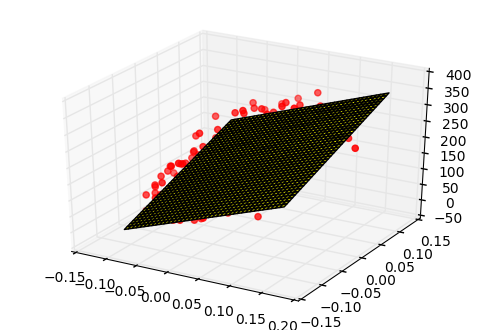

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = diabetes.data[:,[2,8]]
y = diabetes.target
regr = linear_model.LinearRegression()
regr.fit(x, y)
steps = 40
lx0 = np.arange(min(x[:,0]), max(x[:,0]), (max(x[:,0]) - min(x[:,0])) / steps).reshape(steps,1)
lx1 = np.arange(min(x[:,1]), max(x[:,1]), (max(x[:,1]) - min(x[:,1])) / steps).reshape(steps,1)
xx0, xx1 = np.meshgrid(lx0, lx1)
xx = np.zeros(shape = (steps,steps,2))
xx[:,:,0] = xx0
xx[:,:,1] = xx1
x_stack = xx.reshape(steps ** 2, 2)
y_stack = regr.predict(x_stack)
yy = y_stack.reshape(steps, steps)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(x[:,0], x[:,1], y, color = 'red')
ax.plot_surface(xx0, xx1, yy, rstride=1, cstride=1,color='yellow')
plt.show()